# Cryptocurrency modelling of hourly data to predict movement of Bitcoin in one hour.
Now I will apply the same modelling however I will use hourly data, rather than daily data. I will now correspond the hourly prices of multiple cryptocurrencies at the same hour, historically, and attempt to predict movement of Bitcoin in the next hour. This is a far lower time scale movement of equilities than daily movement of stocks. It is important to take note that cryptocurencies are far more volalitile, indcredibly larger standard deviation, than the indices used previously.

The cryptocurrencies used are Dash, ZEC, XRP, LTC, ETH, respectively. The target currency is Bitcoin (BTC). The data is over 3000 datapoints of hourly prices, and the corresponding price of Bitcoin the next hour. 

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
test_inputs = pd.read_csv('Cryptocurrencydataraw.csv', delimiter=',')
test_inputs = np.asarray(test_inputs)
test_inputs

import warnings
warnings.filterwarnings('ignore')

In [26]:
X = test_inputs[:,14:18] #data 
Y = test_inputs[:,13] #target
X=X.astype('float')
Y=Y.astype('float')

print(X)

[[ 0.0012  0.0035 -0.0023  0.0058]
 [ 0.0048 -0.0087 -0.0041  0.0033]
 [-0.0009  0.0002  0.0092  0.0017]
 ...
 [-0.009   0.0055 -0.0016  0.0021]
 [-0.0033 -0.021   0.0007 -0.0011]
 [ 0.0148  0.018   0.0021  0.0018]]


In [27]:

X_d = np.array(np.round(X*1000,decimals=0))
Y_d = np.array(np.round(Y*1000,decimals=0))

X_d=X_d.astype('int')
Y_d=Y_d.astype('int')
Y_d = np.array( Y_d>=0, dtype='int')

print(Y_d)

[0 1 0 ... 1 1 1]


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_d, Y_d)

In [29]:
len(X_d),len(X_train),len(X_test)

(3224, 2418, 806)

In [30]:
estimator = KNeighborsClassifier(n_neighbors=40)

In [31]:
estimator.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=40, p=2,
           weights='uniform')

In [32]:
y_predicted = estimator.predict(X_test)
accuracy = np.mean(y_test == y_predicted) *100
print("The accuracy is {0:.1f}%".format(accuracy))

The accuracy is 52.1%


In [34]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator, X_d, Y_d, scoring = 'accuracy')
average_accuracy = np.mean(scores)*100
print("The accuracy is {0:.1f}%".format(average_accuracy))

The accuracy is 54.5%


In [35]:

avg_scores = []
all_scores = []
parameters = list(range(1,20))
for n_neighbors in parameters:
    estimator = KNeighborsClassifier(n_neighbors=n_neighbors)
    scores = cross_val_score(estimator, X_d, Y_d, scoring = 'accuracy')
    avg_scores.append(np.mean(scores))
    all_scores.append(scores)

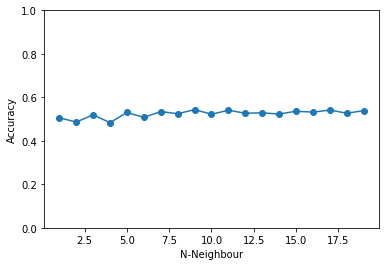

0.5434229786496904


In [36]:

import matplotlib.pyplot as plt
plt.plot(parameters, avg_scores, '-o')
plt.xlabel('N-Neighbour')
plt.ylabel('Accuracy')
plt.ylim([0,1])

plt.show()
print(np.max(avg_scores))

In [24]:
import requests
url = 'https://min-api.cryptocompare.com/data/histominute' +\
        '?fsym=ETH' +\
        '&tsym=USD' +\
        '&limit=2000' +\
        '&aggregate=1'
response = requests.get(url)
data = response.json()['Data']

import pandas as pd
df = pd.DataFrame(data)
print(df)

       close    high     low    open        time  volumefrom   volumeto
0     111.19  111.19  111.17  111.19  1543927380       49.29    5510.41
1     111.23  111.23  111.19  111.19  1543927440       60.49    6676.10
2     111.20  111.23  111.20  111.23  1543927500       69.59    7772.68
3     111.21  111.21  111.20  111.20  1543927560      193.18   21621.73
4     111.20  111.21  111.16  111.21  1543927620       78.66    8750.72
5     111.18  111.20  111.17  111.20  1543927680      120.64   13292.36
6     111.21  111.21  111.18  111.18  1543927740      307.53   34479.13
7     111.20  111.21  111.20  111.21  1543927800       31.64    3501.22
8     111.19  111.22  111.19  111.20  1543927860      338.92   37546.00
9     111.17  111.19  111.16  111.19  1543927920      157.27   17578.15
10    111.16  111.17  111.16  111.17  1543927980       24.44    2731.00
11    111.15  111.16  111.15  111.16  1543928040       23.69    2661.43
12    111.17  111.17  111.15  111.15  1543928100      193.04   2